In [1]:
import torch, random, sys

import tonic
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim import Adam

from sinabs.activation.surrogate_gradient_fn import PeriodicExponential

import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../../utils')
sys.path.append('../models')

from train_test_fn import training_loop, load_dataset, split_train_validation, load_architecture
from weight_initialization import rescale_method_1

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('device: ', torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')

device:  NVIDIA GeForce RTX 3070 Ti


In [3]:
rand_seed = 1

In [4]:
achitecture = 'ResSCNN4'

In [5]:
torch.backends.cudnn.enabled = False
torch.backends.cudnn.deterministic = True
random.seed(rand_seed)
torch.manual_seed(rand_seed)
torch.cuda.manual_seed(rand_seed)
np.random.seed(rand_seed)

In [6]:
batch_size = 8
num_workers = 4
epochs = 125
lr = 5e-5

spk_thr = 2.0
v_min = -0.313

grad_scale = 1.534
grad_width = 0.759

validation_ratio = 0.2
n_time_steps = 50

## Loading Data

In [7]:
snn_train_dataset, snn_test_dataset, sensor_size = load_dataset('DVSGESTURE', n_time_steps)

getting validation dataset....

In [8]:
train_dataset, validation_dataset = split_train_validation(validation_ratio, snn_train_dataset, rand_seed)

In [9]:
sample_data, label = train_dataset[0]
print(f"The transformed array is in shape [Time-Step, Channel, Height, Width] --> {sample_data.shape}")

The transformed array is in shape [Time-Step, Channel, Height, Width] --> (50, 2, 128, 128)


disk caching samples...

In [10]:
disk_cache_train = tonic.DiskCachedDataset(
    dataset=train_dataset,
    cache_path='./cached_train'
)
snn_train_dataloader = DataLoader(disk_cache_train, batch_size=batch_size, num_workers=num_workers, drop_last=True, shuffle=True)

disk_cache_validation = tonic.DiskCachedDataset(
    dataset=validation_dataset,
    cache_path='./cached_validation'
)
snn_validation_dataloader = DataLoader(disk_cache_validation, batch_size=batch_size, num_workers=num_workers, drop_last=True, shuffle=True)

disk_cache_test = tonic.DiskCachedDataset(
    dataset=snn_test_dataset,
    cache_path='./cached_test'
)
snn_test_dataloader = DataLoader(disk_cache_test, batch_size=batch_size, num_workers=num_workers, drop_last=True, shuffle=False)

## Network Module

In [11]:
snn = load_architecture(achitecture, sensor_size, 11, batch_size, PeriodicExponential(grad_scale=grad_scale, grad_width=grad_width), v_min, spk_thr).to(device)
snn.init_weights()

In [12]:
# lambda_ = 0.8
# snn.rescale_conv_weights(rescale_method_1, lambda_)

In [13]:
optimizer = Adam(snn.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-8)
loss_fn = CrossEntropyLoss()

## Training loop

In [14]:
epochs_x, epochs_y, epochs_acc = training_loop(
    device, 
    n_time_steps,
    batch_size,
    sensor_size,
    snn_train_dataloader, 
    snn, 
    loss_fn, 
    optimizer, 
    epochs, 
    snn_validation_dataloader)

  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 0 accuracy: 13.942307692307693


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 1 accuracy: 23.076923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 2 accuracy: 24.519230769230766


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 3 accuracy: 27.403846153846157


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 4 accuracy: 28.846153846153843


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 5 accuracy: 29.326923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 6 accuracy: 27.884615384615387


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 7 accuracy: 29.807692307692307


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 8 accuracy: 32.21153846153847


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 9 accuracy: 30.76923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 10 accuracy: 32.69230769230769


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 11 accuracy: 34.61538461538461


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 12 accuracy: 35.57692307692308


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 13 accuracy: 35.09615384615385


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 14 accuracy: 35.57692307692308


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 15 accuracy: 39.90384615384615


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 16 accuracy: 35.57692307692308


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 17 accuracy: 38.94230769230769


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 18 accuracy: 39.90384615384615


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 19 accuracy: 42.30769230769231


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 20 accuracy: 37.5


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 21 accuracy: 44.71153846153847


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 22 accuracy: 40.86538461538461


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 23 accuracy: 43.269230769230774


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 24 accuracy: 42.30769230769231


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 25 accuracy: 44.230769230769226


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 26 accuracy: 48.55769230769231


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 27 accuracy: 47.11538461538461


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 28 accuracy: 48.55769230769231


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 29 accuracy: 50.480769230769226


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 30 accuracy: 51.92307692307693


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 31 accuracy: 56.730769230769226


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 32 accuracy: 56.25


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 33 accuracy: 54.807692307692314


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 34 accuracy: 53.84615384615385


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 35 accuracy: 58.17307692307693


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 36 accuracy: 58.65384615384615


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 37 accuracy: 60.57692307692307


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 38 accuracy: 64.90384615384616


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 39 accuracy: 63.942307692307686


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 40 accuracy: 59.13461538461539


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 41 accuracy: 60.57692307692307


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 42 accuracy: 62.019230769230774


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 43 accuracy: 63.942307692307686


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 44 accuracy: 63.46153846153846


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 45 accuracy: 62.5


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 46 accuracy: 63.942307692307686


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 47 accuracy: 65.38461538461539


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 48 accuracy: 64.90384615384616


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 49 accuracy: 63.942307692307686


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 50 accuracy: 65.38461538461539


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 51 accuracy: 65.38461538461539


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 52 accuracy: 63.942307692307686


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 53 accuracy: 63.46153846153846


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 54 accuracy: 62.5


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 55 accuracy: 63.46153846153846


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 56 accuracy: 65.86538461538461


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 57 accuracy: 64.90384615384616


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 58 accuracy: 66.82692307692307


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 59 accuracy: 68.26923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 60 accuracy: 67.3076923076923


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 61 accuracy: 69.71153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 62 accuracy: 69.71153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 63 accuracy: 68.75


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 64 accuracy: 70.1923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 65 accuracy: 69.71153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 66 accuracy: 70.1923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 67 accuracy: 70.1923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 68 accuracy: 71.15384615384616


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 69 accuracy: 69.71153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 70 accuracy: 67.3076923076923


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 71 accuracy: 70.1923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 72 accuracy: 70.1923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 73 accuracy: 69.23076923076923


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 74 accuracy: 69.71153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 75 accuracy: 69.23076923076923


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 76 accuracy: 69.71153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 77 accuracy: 70.67307692307693


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 78 accuracy: 70.1923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 79 accuracy: 68.75


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 80 accuracy: 71.63461538461539


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 81 accuracy: 69.71153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 82 accuracy: 69.71153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 83 accuracy: 70.1923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 84 accuracy: 68.75


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 85 accuracy: 68.75


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 86 accuracy: 68.75


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 87 accuracy: 74.51923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 88 accuracy: 74.51923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 89 accuracy: 69.71153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 90 accuracy: 79.8076923076923


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 91 accuracy: 78.36538461538461


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 92 accuracy: 85.09615384615384


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 93 accuracy: 78.84615384615384


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 94 accuracy: 82.6923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 95 accuracy: 79.8076923076923


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 96 accuracy: 78.84615384615384


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 97 accuracy: 79.32692307692307


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 98 accuracy: 79.32692307692307


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 99 accuracy: 80.28846153846155


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 100 accuracy: 84.13461538461539


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 101 accuracy: 84.61538461538461


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 102 accuracy: 84.13461538461539


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 103 accuracy: 85.09615384615384


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 104 accuracy: 83.65384615384616


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 105 accuracy: 85.09615384615384


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 106 accuracy: 82.21153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 107 accuracy: 80.76923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 108 accuracy: 87.5


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 109 accuracy: 87.5


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 110 accuracy: 84.61538461538461


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 111 accuracy: 87.01923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 112 accuracy: 86.53846153846155


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 113 accuracy: 84.13461538461539


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 114 accuracy: 83.17307692307693


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 115 accuracy: 83.17307692307693


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 116 accuracy: 85.57692307692307


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 117 accuracy: 79.8076923076923


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 118 accuracy: 82.6923076923077


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 119 accuracy: 81.25


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 120 accuracy: 84.13461538461539


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 121 accuracy: 82.21153846153845


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 122 accuracy: 81.73076923076923


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 123 accuracy: 84.61538461538461


  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 124 accuracy: 83.17307692307693


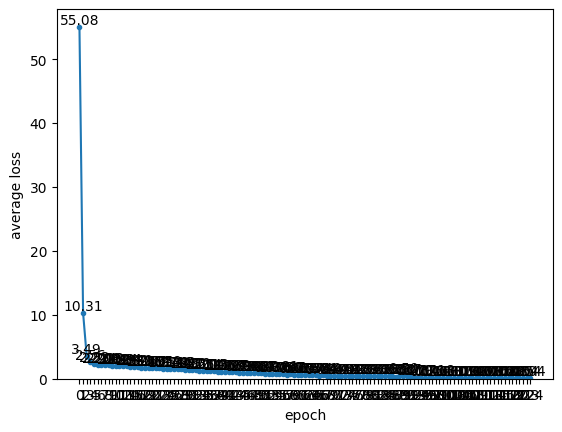

In [15]:
y_avg = []
for y in epochs_y:
    y_avg.append(np.mean(y))

plt.plot(np.arange(len(epochs_x)), y_avg, marker = '.')
plt.xlabel('epoch')
plt.ylabel('average loss')
plt.ylim(0,)
plt.xticks(np.arange(len(epochs_x)))
for i, txt in enumerate(y_avg):
    plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom', color = 'k')
plt.show()

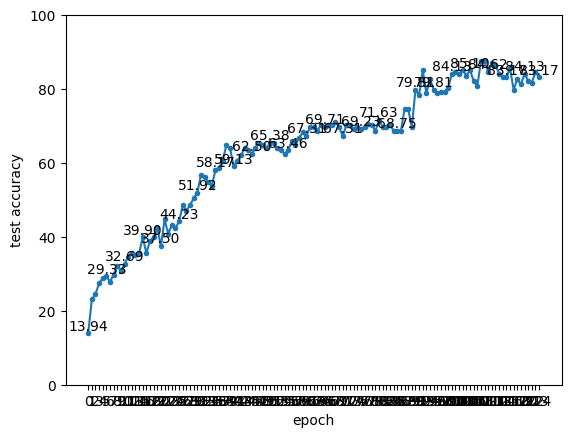

In [16]:
plt.plot(np.arange(len(epochs_x)), epochs_acc, marker = '.')
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.ylim(0, 100)
plt.xticks(np.arange(len(epochs_x)))
for i, txt in enumerate(epochs_acc):
    if i%5 ==0 or i == epochs-1:
        plt.text(i, txt, f'{txt:.2f}', ha='center', va='bottom', color = 'k')
plt.show()

In [17]:
# with open(f'./architectures_results/{achitecture}-Training_Validation-TM.npy', 'wb') as f:
#     np.save(f, np.array(epochs_x))
#     np.save(f, np.array(epochs_y))
#     np.save(f, np.array(epochs_acc))